# Simulated Annealing Demo

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [7]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'

## Reading input data

In [8]:
qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])
print('Problem size: %d' % n)

A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))
print('Flow matrix:\n', A)

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))
print('Distance matrix:\n', B)

Problem size: 12
Flow matrix:
 [[0. 1. 2. 3. 1. 2. 3. 4. 2. 3. 4. 5.]
 [1. 0. 1. 2. 2. 1. 2. 3. 3. 2. 3. 4.]
 [2. 1. 0. 1. 3. 2. 1. 2. 4. 3. 2. 3.]
 [3. 2. 1. 0. 4. 3. 2. 1. 5. 4. 3. 2.]
 [1. 2. 3. 4. 0. 1. 2. 3. 1. 2. 3. 4.]
 [2. 1. 2. 3. 1. 0. 1. 2. 2. 1. 2. 3.]
 [3. 2. 1. 2. 2. 1. 0. 1. 3. 2. 1. 2.]
 [4. 3. 2. 1. 3. 2. 1. 0. 4. 3. 2. 1.]
 [2. 3. 4. 5. 1. 2. 3. 4. 0. 1. 2. 3.]
 [3. 2. 3. 4. 2. 1. 2. 3. 1. 0. 1. 2.]
 [4. 3. 2. 3. 3. 2. 1. 2. 2. 1. 0. 1.]
 [5. 4. 3. 2. 4. 3. 2. 1. 3. 2. 1. 0.]]
Distance matrix:
 [[ 0.  5.  2.  4.  1.  0.  0.  6.  2.  1.  1.  1.]
 [ 5.  0.  3.  0.  2.  2.  2.  0.  4.  5.  0.  0.]
 [ 2.  3.  0.  0.  0.  0.  0.  5.  5.  2.  2.  2.]
 [ 4.  0.  0.  0.  5.  2.  2. 10.  0.  0.  5.  5.]
 [ 1.  2.  0.  5.  0. 10.  0.  0.  0.  5.  1.  1.]
 [ 0.  2.  0.  2. 10.  0.  5.  1.  1.  5.  4.  0.]
 [ 0.  2.  0.  2.  0.  5.  0. 10.  5.  2.  3.  3.]
 [ 6.  0.  5. 10.  0.  1. 10.  0.  0.  0.  5.  0.]
 [ 2.  4.  5.  0.  0.  1.  5.  0.  0.  0. 10. 10.]
 [ 1.  5.  2.  0.  5.  

## Objective function

In [9]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [10]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


## Random Sampling

In [11]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

57.436283349990845
598.0 [ 1  7  0  2  9  6 10  8  4  5  3 11]


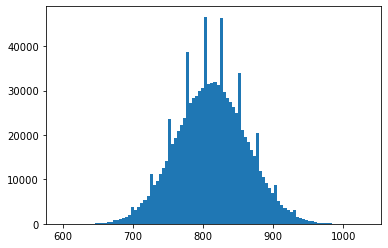

812.052964 49.736901419516535


In [12]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [13]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

0.0
40.20363640785217 608.0


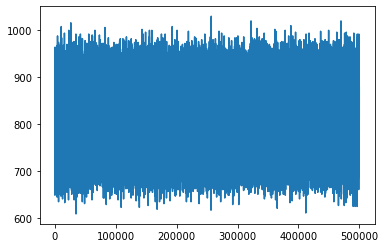

0.2
41.81767654418945 578.0


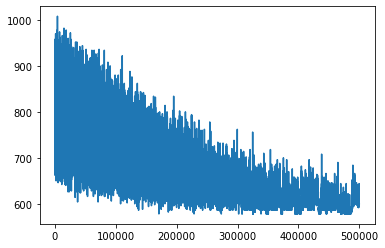

0.4
41.37910771369934 578.0


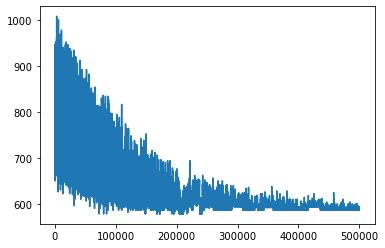

0.6000000000000001
41.73493671417236 578.0


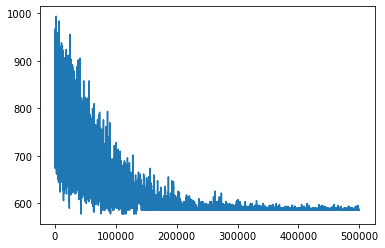

0.8
43.02543497085571 578.0


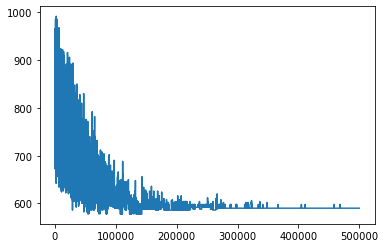

1.0
42.26128125190735 578.0


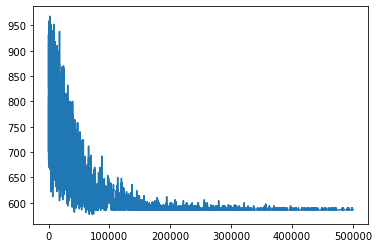

1.2000000000000002
42.1286723613739 578.0


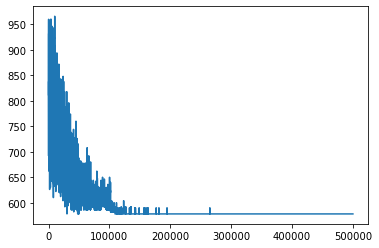

1.4000000000000001
42.78873872756958 578.0


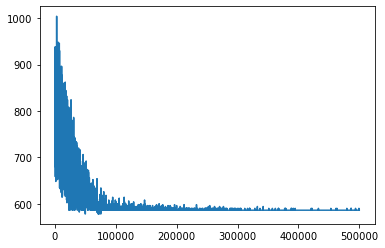

1.6
43.84311628341675 578.0


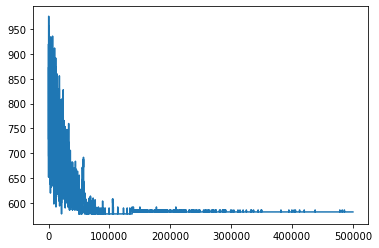

1.8
43.13276529312134 578.0


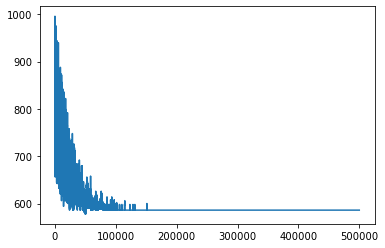

In [14]:
for i in np.arange(0.0,2.0,0.2):
    print(i)
    T = 500000
    radius = 1
    alpha = i

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    plt.figure()
    plt.plot(costs)
    plt.show()

## b)

In [15]:
def sa_permutation():
    T = 175000
    radius = 1
    alpha = 1.2

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    return p

In [16]:
t0 = time.time()

T = 100

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = sa_permutation()
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

1454.2948369979858
578.0 [11  6  8  2  3  7 10  0  4  5  9  1]


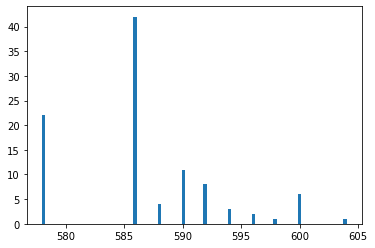

586.82 6.2102817971489825


In [17]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## a)

In [18]:
instances = [12,14,15,17,18]
urls = {n: 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug{}.dat'.format(n) for n in instances}
opt = {12: 578, 14: 1014, 15: 1150, 17: 1732, 18:1930}

In [19]:
def get_data(n):
    qap_instance_file = urllib.request.urlopen(urls[n])
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    return A, B

In [20]:
def qap_objective_function_AB(p,A,B,n):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

578 586.0 [ 9  1  0  2  5 10  6  8  4  3  7 11] with time:  42.41942238807678


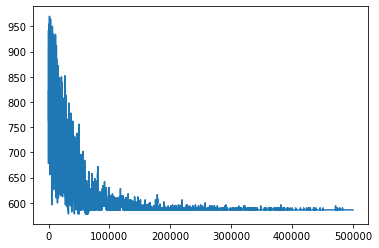

1014 1018.0 [ 3  2 13  4  5  1 12  7  6  9  0  8 10 11] with time:  45.614744424819946


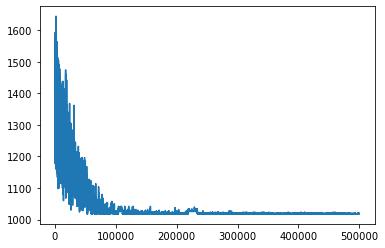

1150 1150.0 [11  4  5 14  9 10  6 13  2  3  8  7 12  1  0] with time:  48.269572734832764


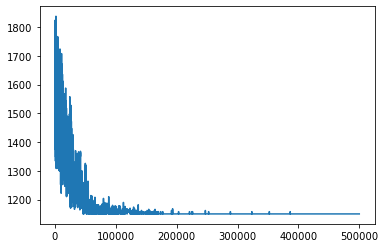

1732 1746.0 [16  0  6  4  5  7 14 11  9 12 10  1 13  2  8  3 15] with time:  51.345505714416504


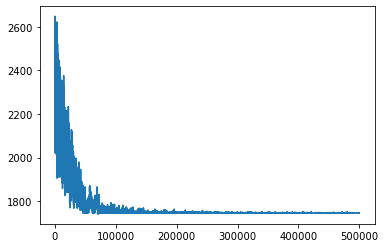

1930 1944.0 [ 5  4  0  6 16  2  9  7 14 17 12 13 11  1  3  8 15 10] with time:  54.18259239196777


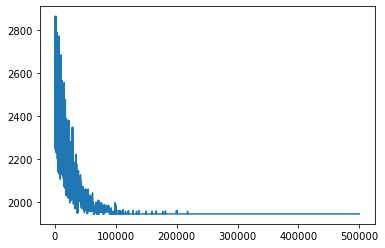

In [21]:
for n in instances:
    A, B = get_data(n)

    T = 500000
    radius = 1
    alpha = 1.2

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function_AB(p,A,B,n)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function_AB(q,A,B,n)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        
    print(opt[n], qap_objective_function_AB(p,A,B,n), p, "with time: ", time.time() - t0)
    
    plt.figure()
    plt.plot(costs)
    plt.show()

## c)

In [22]:
def sa_permutation_diff(radius,alpha):
    T = 175000

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    diff = np.zeros(T)
    successes = np.zeros(T)
    setbacks = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        setbacks[t] = setbacks[t-1]
        successes[t] = successes[t-1]
        if(q_cost < p_cost):
            diff[t] = q_cost - p_cost
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            diff[t] = q_cost - p_cost
            p, p_cost = q, q_cost
        if diff[t] > 0:
            successes[t] += 1
        if diff[t] < 0:
            setbacks[t] += 1
    return (diff, successes, setbacks)

In [23]:
A,B = get_data(n)
args = [(1,0.5),(1,1.5),(1,2.5),(2,0.8),(2,1.2),(3,1.2),(4,1.2),(5,1.2)]
data = []
for (r,a) in args:
    data.append(sa_permutation_diff(r, a))


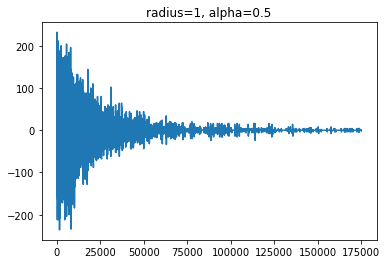

/home/maurykdell/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


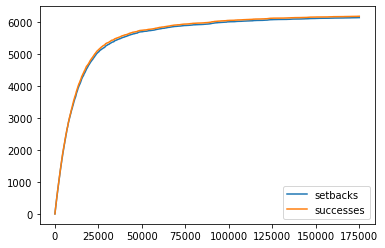

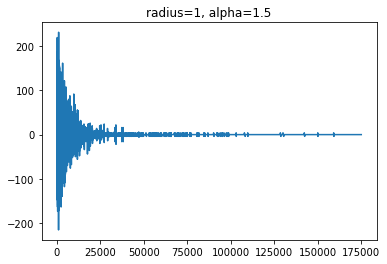

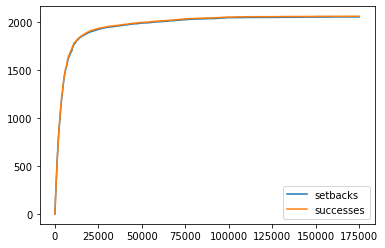

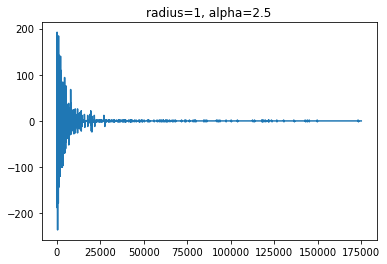

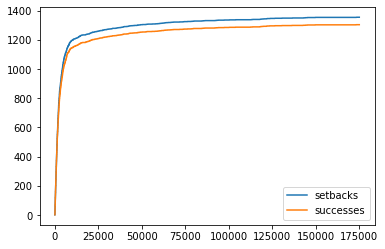

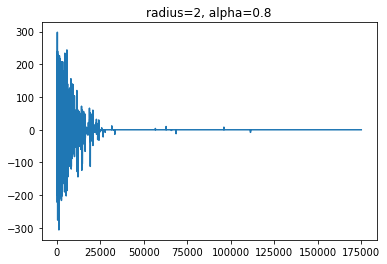

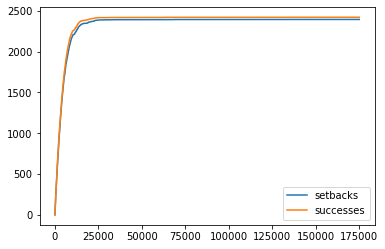

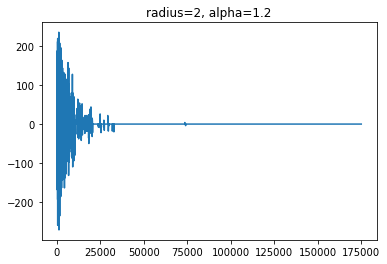

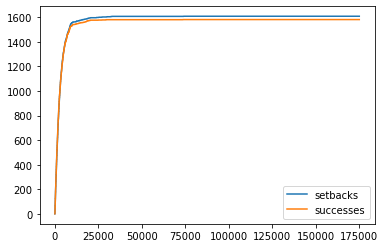

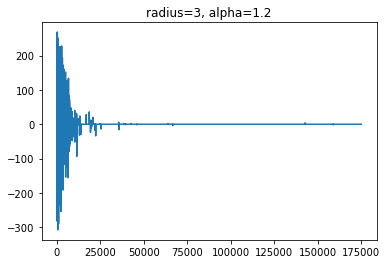

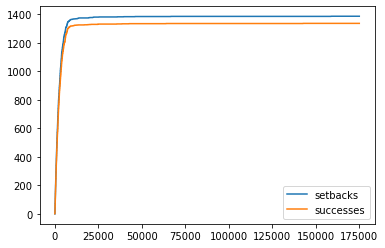

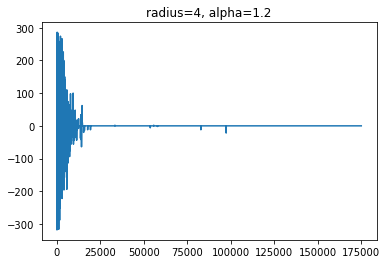

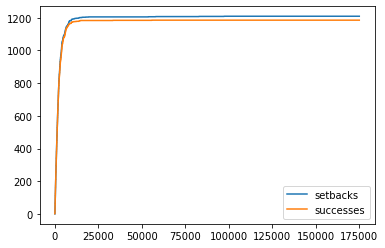

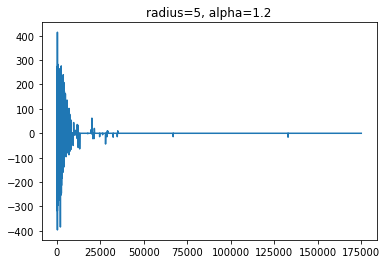

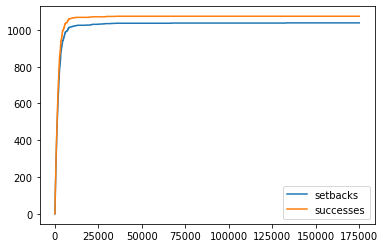

In [24]:
for i in range(len(args)):
    plt.figure()
    plt.plot(data[i][0])
    plt.title('radius={}, alpha={}'.format(args[i][0],args[i][1]))
    
    plt.figure()
    plt.plot(data[i][2], label='setbacks')
    plt.plot(data[i][1], label='successes')
    plt.legend()
    plt.show()
    

## d)

In [25]:
from scipy.stats import kendalltau

n = 12
radius = 1
alpha = 1.3
T = 175000

A, B = get_data(n)

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)

diff = np.zeros(T)
dist = np.zeros(T)


for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)

    if(q_cost < p_cost):
        diff[t] = p_cost - q_cost
        dist[t] = kendalltau(p,q)[0]
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost



Text(0, 0.5, 'distance (Kendall tau)')

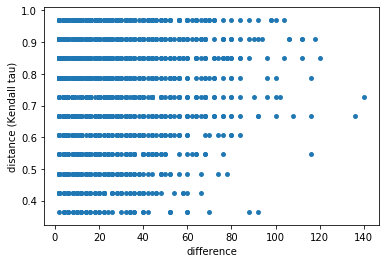

In [26]:
diff = diff[diff != 0]
dist = dist[dist != 0]

plt.figure()
plt.scatter(diff,dist,s=15)
plt.xlabel("difference")
plt.ylabel("distance (Kendall tau)")

## e)

In [27]:
def check_deep(lvl,p,A,B,n):
    if lvl == 0:
        return qap_objective_function_AB(p,A,B,n)
    p = random_neighbor(p, radius)

    return min(check_deep(lvl-1,p,A,B,n), qap_objective_function_AB(p,A,B,n))

578 578.0 [ 2  8  6 11  0 10  7  3  1  9  5  4] with time:  66.83295679092407


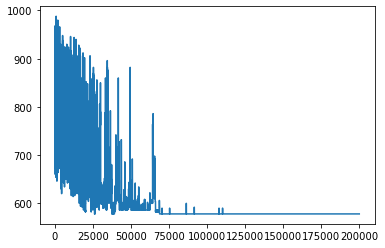

In [28]:
for n in [12]:#instances:
    A, B = get_data(n)

    T = 200000
    radius = 1
    alpha = 0.9

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function_AB(p,A,B,n)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function_AB(q,A,B,n)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)) or (check_deep(3,q,A,B,n) < p_cost):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        
    print(opt[n], qap_objective_function_AB(p,A,B,n), p, "with time: ", time.time() - t0)
    
    plt.figure()
    plt.plot(costs)
    plt.show()

# zad. 2

In [33]:
def random_individual(p,d):
    random_vec = np.random.rand(d)
    return (random_vec < p).astype(int)

def random_population(p,d,N):
    return np.array([random_individual(p,d) for i in range(N)])

def OneMax(p):
    return np.sum(p)
    
def Deceptive_OneMax(p):
    s = np.sum(p)
    if s == 0:
        return len(p) + 1
    return s

def KDeceptive_OneMax(p):
    s = np.split(p,5)
    d = [Deceptive_OneMax(pp) for pp in s]
    return sum(d)

In [34]:
functions = [OneMax,Deceptive_OneMax,KDeceptive_OneMax]


def PBIL(d,N,t1,t2,t3,T):

    costs = []
    for f_ind in range(len(functions)):
        costs.append(np.zeros(T))
        opt_f = functions[f_ind]
        p = np.ones(d)
        p = p/2
        P = random_population(p,d,N)
        for t in range(T):
            val = np.array([opt_f(P[i]) for i in range(N)])
            x_best = P[val.argmax()]
            costs[f_ind][t] = opt_f(x_best)

            for i in range(N):
                p = p * (1 - t1) + x_best * t1

            for j in range(N):
                if np.random.rand() < t2:
                    p = p * (1 - t3) + random_individual((np.ones(d)/2),d) * t3

            P = random_population(p,d,N)
        
    return costs
            
    

In [44]:
args = [(100,1000,0.6,0.005,0.002,1000),(100,1000,0.0001,0.005,0.002,1000),(100,100,0.4,0.1,1.0,1000),(100,10,0.1,0.01,0.2,100),(100,1000,0.0,0.5,0.5,1000), (100,1000,0.3,0.0,0.5,1000)]

data = [PBIL(a[0],a[1],a[2],a[3],a[4],a[5]) for a in args]

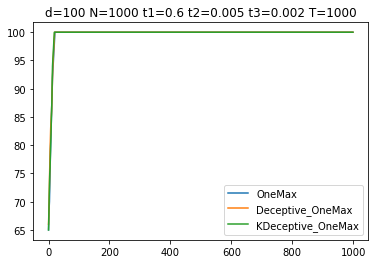

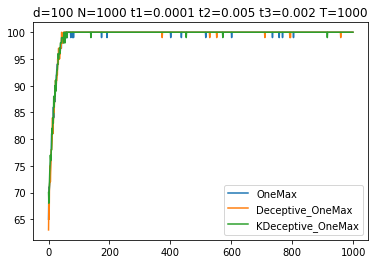

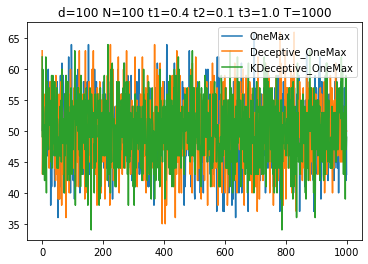

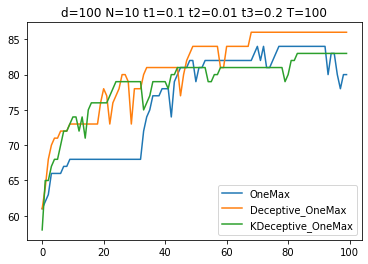

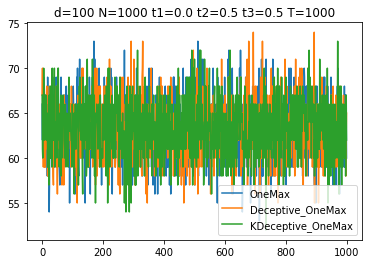

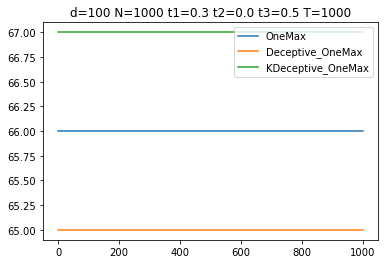

100.0


In [45]:

for i in range(len(args)):
    plt.figure()
    plt.title('d={} N={} t1={} t2={} t3={} T={}'.format(args[i][0],args[i][1],args[i][2],args[i][3],args[i][4],args[i][5]))
    plt.plot(data[i][0], label='OneMax')
    plt.plot(data[i][1], label='Deceptive_OneMax')
    plt.plot(data[i][2], label='KDeceptive_OneMax')
    plt.legend()
    plt.show()
    
print(np.max(data[0][1]))
    